In [3]:
from utils import *
features, labels, handles = initial_processing("default_of_credit_card_clients.xls")
"""
Lets already get rid of redundant features 
Using a threshold ϵ = 0.95, such that
above it, features with cov > ϵ get selected
and the one with the lowest KW score gets eliminated
"""
features = redundancy_check(features, 0.95, labels)
classifiers = ["euclidean", "mahalanobis"]

In [2]:
#"Vanilla" 
for classifier in classifiers:
    run(features, labels, 25, 0.7, 0.15, classifier = classifier)

Training error: 0.4656 ± 0.0021
Validation error: 0.4685 ± 0.0094
Execution time: 155.43
Training error: 0.3004 ± 0.0033
Validation error: 0.3021 ± 0.0087
Execution time: 145.29


In [3]:
# with PCA (kaiser)
for classifier in classifiers:
    run(PCA(features, kaiser), labels, 25, 0.7, 0.15, classifier = classifier)

Training error: 0.3619 ± 0.0033
Validation error: 0.3611 ± 0.0086
Execution time: 111.97
Training error: 0.3527 ± 0.0027
Validation error: 0.3528 ± 0.0075
Execution time: 112.29


In [4]:
# with PCA (scree, ϵ = 1e-1)
for classifier in classifiers:
    run(PCA(features, scree), labels, 25, 0.7, 0.15, classifier = classifier)

Training error: 0.3670 ± 0.0022
Validation error: 0.3670 ± 0.0083
Execution time: 111.39
Training error: 0.3550 ± 0.0031
Validation error: 0.3566 ± 0.0060
Execution time: 111.17


In [5]:
# With Fisher LDA
run(LDA(features, labels), labels, 25, 0.7, 0.15, classifier = "euclidean")

Training error: 0.2770 ± 0.0022
Validation error: 0.2744 ± 0.0058
Execution time: 100.48


Training error: 0.2734 ± 0.0020
Validation error: 0.2743 ± 0.0077
Testing error: 0.2786
In the form:
[TP FN
FP TN]
Confusion matrix: [[ 231  798]
 [ 911 6262]]
Accuracy: 0.7916
Precision: 0.2023
Sensitivity: 0.2245
Specificity: 0.8730
F1 score: 0.2128
AUC: 0.7150
Execution time: 104.38


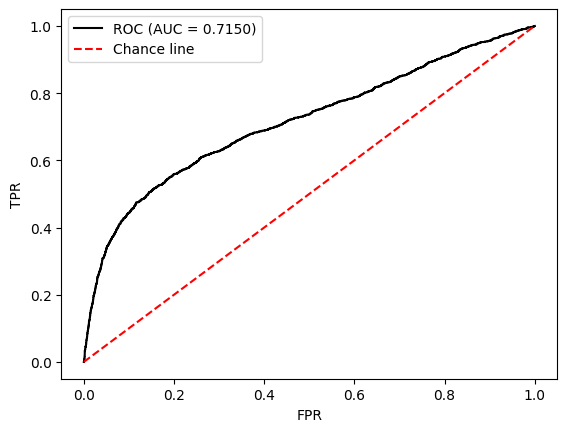

In [4]:
"""
Based on these results, we'll use Fisher LDA
to check with the testing dataset, as it had
the lowest validation errors
"""
run(LDA(features, labels), labels, 25, 0.7, 0.15, classifier = "euclidean",
   testing=True, plot=True)